# Exercício 04
## Dados desbalanceados
### Alunos:

- Francielle Alves Vargas


---

O dataset que será utilizado nessa questão possui 5 variáveis (`Deviations	EmotionCount	NumberWord	SucRate	Time2ans`) de entrada numéricas e 1 variável (`True Value`) de saída que representa a classe. Esse problema possui 3 classes possíveis, `-1`, `0` e `1`.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

# New Section

### Questão 01.
Carregue o dataset `DataBaseDT.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



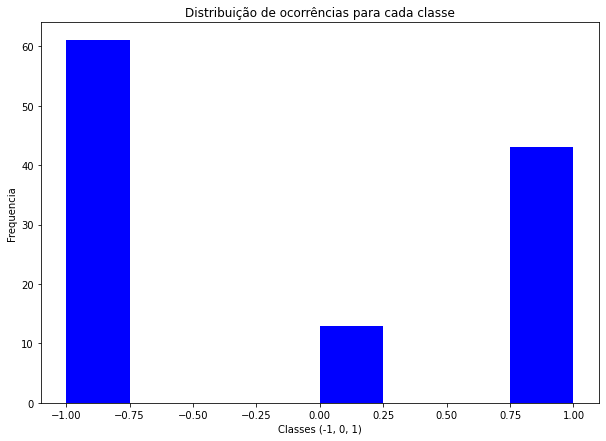

-----------------------------------------------------------------------
-1    61
 1    43
 0    13
Name: True Value, dtype: int64
-----------------------------------------------------------------------


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("DataBaseDT.csv")
plt.figure(figsize = (10, 7)) 
x = df["True Value"] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (-1, 0, 1)')
plt.show()

print('-----------------------------------------------------------------------')
print(df['True Value'].value_counts())
print('-----------------------------------------------------------------------')




---

### Questão 02.

Utilize a técnica de subamostragem aleatória nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial**.

-----------------------------------------------------------------------
 1    13
-1    13
 0    13
Name: true_value, dtype: int64
-----------------------------------------------------------------------


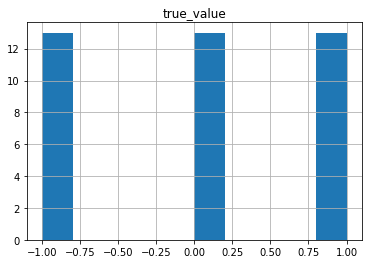

In [6]:
from collections import Counter
df['True Value'].value_counts()

#renomando a coluna classe
df_new = df.rename(columns={'True Value': 'true_value'})

#seleciona as columas desbalanciadas
classe_1 = df_new[df_new.true_value == -1]
classe_2 = df_new[df_new.true_value == 1]

#Obtendo a amostra (menor representatividade)
sample_1 = classe_1.sample(n=13, replace=False)
sample_2 = classe_2.sample(n=13, replace=False)

#Concatenando e mostrando novos dados com MENOR representatividade no conjunto de dados inicial.
classe_0 = df_new[df_new.true_value == 0]
dados_downsampled = pd.concat([classe_0, sample_1, sample_2])
dados_downsampled.hist('true_value')

print('-----------------------------------------------------------------------')
print(dados_downsampled['true_value'].value_counts())
print('-----------------------------------------------------------------------')




---

### Questão 03.

Utilize a técnica de superamostragem aleatória nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial**.

-----------------------------------------------------------------------
 0    61
 1    61
-1    61
Name: true_value, dtype: int64
-----------------------------------------------------------------------


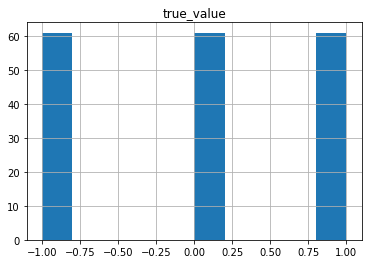

In [7]:
#seleciona as columas desbalanciadas
classe_1 = df_new[df_new.true_value == 1]
classe_2 = df_new[df_new.true_value == 0]

#Obtendo a amostra (maior representatividade)
sample_1 = classe_1.sample(n=61, replace=True)
sample_2 = classe_2.sample(n=61, replace=True)

#Concatenando e mostrando novos dados com MAIOR representatividade no conjunto de dados inicial.
classe_0 = df_new[df_new.true_value == -1]
dados_upsampled = pd.concat([classe_0, sample_1, sample_2])
dados_upsampled.hist('true_value')

print('-----------------------------------------------------------------------')
print(dados_upsampled['true_value'].value_counts())
print('-----------------------------------------------------------------------')


---

### Questão 04.

Utilize as técnicas de subamostragem e superamostragem nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$**.

-----------------------------------------------------------------------
-1    39
 1    39
 0    39
Name: true_value, dtype: int64
-----------------------------------------------------------------------


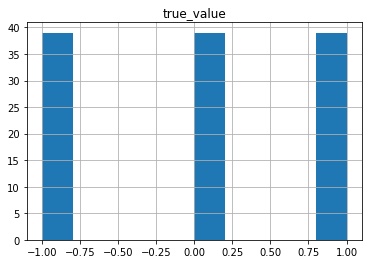

In [8]:
#seleciona todas columas
classe_0 = df_new[df_new.true_value == 0]
classe_1 = df_new[df_new.true_value == 1]
classe_2 = df_new[df_new.true_value == -1]

#Obtendo a amostra (sub+sup = dataset/3)
sample_0 = classe_0.sample(n=39, replace=True)
sample_1 = classe_1.sample(n=39, replace=False)
sample_2 = classe_2.sample(n=39, replace=False)

#Concatenando e mostrando novos dados com MAIOR representatividade no conjunto de dados inicial.
dados_avg = pd.concat([sample_0, sample_1, sample_2])
dados_avg.hist('true_value')

print('-----------------------------------------------------------------------')
print(dados_avg['true_value'].value_counts())
print('-----------------------------------------------------------------------')




---

### Questão 05.

Para cada um dos conjuntos utilizados nas questões 1 a 4, separe o conjunto de dados em variáveis de entrada e variável alvo e normalize as **variáveis de entrada** entre 0 e 1 (`sklearn.preprocessing.MinMaxScaler`). 

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Separando as features
X1 = df_new.iloc[:, :-1]
X2 = dados_downsampled.iloc[:, :-1]
X3 = dados_upsampled.iloc[:, :-1]
X4 = dados_avg.iloc[:, :-1]
#Separando a classe
Y1 = df_new.iloc[:,-1]
Y2 = dados_downsampled.iloc[:,-1]
Y3 = dados_upsampled.iloc[:,-1]
Y4 = dados_avg.iloc[:,-1]
#Normalização
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1)
X2_train = scaler.fit_transform(X2)
X3_train = scaler.fit_transform(X3)
X4_train = scaler.fit_transform(X4)

y1_train = Y1
y2_train = Y2
y3_train = Y3
y4_train = Y4



---

### Questão 06.

Teste o score de classificação, utilizando a função `model_tester` abaixo, para cada um dos conjuntos da questão anterior.

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np


def model_tester(inputs, target, weights=None):
  """
  Executa classificação do conjunto de dados passado
  ---------------------------------------------------------------
  inputs:     Variáveis de entrada (X)
  target:     Variáveis alvo (y)  
  weights:    Dicionário com o peso de cada classe. Cada chave do dicionário é
              uma classe, e seu valor o associado a essa classe. Por exemplo, se
              tivermos duas classes 0 e 1 com mesmo peso, teremos o dicionario:
              {0: 0.5, 1: 0.5}

  ---------------------------------------------------------------
  Realiza a classificação em 3 modelos (SVM com kernel linear, 
  SVM com kernel polinomial de grau 3, Árvore de decisão)
  O desempenho é calculado utilizando a acurácia balanceada.
  """

  if isinstance(inputs, pd.core.frame.DataFrame):
    inputs = inputs.values
  if isinstance(target, pd.core.frame.DataFrame) or isinstance(target, pd.core.series.Series):
    target = target.values
  testes = {
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights)    
  }
  for teste in testes:
    clf = testes[teste]    
    skf = StratifiedKFold(n_splits=10)
    scores = []
    for train_index, test_index in skf.split(inputs, target):      
      X_train, X_test = inputs[train_index], inputs[test_index]
      y_train, y_test = target[train_index], target[test_index]
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)      
      # scores.append(precision_score(y_test, y_pred,labels=[-1, 0, 1], average='macro', zero_division=0))
      scores.append(balanced_accuracy_score(y_test, y_pred))
    print("Score do classificador '%s': %.2f" % (teste, np.mean(scores)*100))

In [41]:
print('-------------------------------------------------------')
model_tester(X1_train, y1_train)
print('-------------------------------------------------------')
model_tester(X2_train, y2_train)
print('-------------------------------------------------------')
model_tester(X3_train, y3_train)
print('-------------------------------------------------------')
model_tester(X4_train, y4_train)

-------------------------------------------------------
Score do classificador 'SVM Linear': 58.30
Score do classificador 'SVM Polinomial grau 3': 61.10
Score do classificador 'Decision Tree (gini)': 59.69
-------------------------------------------------------
Score do classificador 'SVM Linear': 70.00
Score do classificador 'SVM Polinomial grau 3': 65.00
Score do classificador 'Decision Tree (gini)': 68.33
-------------------------------------------------------
Score do classificador 'SVM Linear': 73.41
Score do classificador 'SVM Polinomial grau 3': 85.63
Score do classificador 'Decision Tree (gini)': 88.41
-------------------------------------------------------
Score do classificador 'SVM Linear': 67.22
Score do classificador 'SVM Polinomial grau 3': 78.89
Score do classificador 'Decision Tree (gini)': 89.72




---

### Questão 07.

Teste o score de classificação no conjunto original alterando o parâmetro `weights`. Esse parâmetro faz com que o algoritmo de classificação leve em conta o peso de cada classe no processo de treinamento. Teste 2 conjuntos de `weights` diferentes e compare com o resultado do conjunto original sem o uso dessa variavel.

In [51]:
print(y1_train.value_counts())

print('-------------------------------------------------------')
model_tester(X1_train, y1_train)
model_tester(X1_train, y1_train, {-1: 0.5, 1: 0.3, 0: 0.2} )
model_tester(X1_train, y1_train, {-1: 0.6, 1: 0.2, 0: 0.2} )
print('-------------------------------------------------------')



-1    61
 1    43
 0    13
Name: true_value, dtype: int64
-------------------------------------------------------
Score do classificador 'SVM Linear': 58.30
Score do classificador 'SVM Polinomial grau 3': 61.10
Score do classificador 'Decision Tree (gini)': 61.02
Score do classificador 'SVM Linear': 56.33
Score do classificador 'SVM Polinomial grau 3': 58.80
Score do classificador 'Decision Tree (gini)': 68.11
Score do classificador 'SVM Linear': 55.50
Score do classificador 'SVM Polinomial grau 3': 57.30
Score do classificador 'Decision Tree (gini)': 61.75
-------------------------------------------------------
